In [1]:
import numpy as np
import numpy.linalg as lina
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('sediments_1.txt',header=None, delim_whitespace=True)

# Test mit 2D Daten

In [3]:
data2=pd.read_csv('agedepth_1.txt',header=None, delim_whitespace=True)

            0           1
0    0.574964   -3.387358
1    1.190081    2.607426
2    1.779235    0.007664
3    2.266800   19.777412
4    3.228975   19.460857
5    4.017528   47.864249
6    5.426164   15.663317
7    5.461763   28.686956
8    6.579106   48.130676
9    7.133111   40.977152
10   8.181446   58.764541
11   8.688811   40.716317
12   9.480829   59.144081
13   9.563888   75.251810
14   9.966092   59.726624
15  10.737034   70.804379
16  11.249168   44.681634
17  11.910960   74.737244
18  11.924943   63.437347
19  11.943416   74.103329
20  12.332423   67.087385
21  12.524693   73.214110
22  13.400077   76.690174
23  15.091028   68.961248
24  15.822464   70.582863
25  16.299041   88.108010
26  16.589485   77.996858
27  17.965035  110.094160
28  18.179787  119.461610
29  19.122448  120.673230


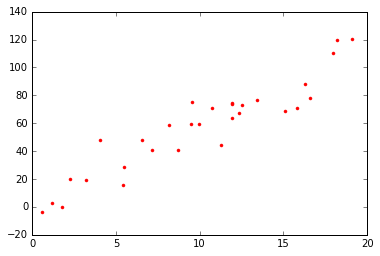

-------------------------------


Means of data columns 
 0     9.954360
1    57.134177
dtype: float64
-------------------------------




In [4]:
print data2
plt.plot(data2[0],data2[1], '.r')
plt.show()

print '-------------------------------\n\n'
print 'Means of data columns \n {}'.format(np.mean(data2,axis=0))
print '-------------------------------\n\n'

In [5]:
Cendata=data2 - np.mean(data2,axis=0 )

In [6]:
print Cendata

           0          1
0  -9.379396 -60.521535
1  -8.764279 -54.526751
2  -8.175125 -57.126513
3  -7.687560 -37.356765
4  -6.725385 -37.673320
5  -5.936832  -9.269928
6  -4.528196 -41.470860
7  -4.492597 -28.447221
8  -3.375254  -9.003501
9  -2.821249 -16.157025
10 -1.772914   1.630364
11 -1.265549 -16.417860
12 -0.473531   2.009904
13 -0.390471  18.117633
14  0.011732   2.592447
15  0.782674  13.670202
16  1.294808 -12.452543
17  1.956600  17.603067
18  1.970583   6.303170
19  1.989056  16.969152
20  2.378063   9.953208
21  2.570333  16.079933
22  3.445717  19.555997
23  5.136668  11.827071
24  5.868104  13.448686
25  6.344681  30.973833
26  6.635125  20.862681
27  8.010675  52.959983
28  8.225427  62.327433
29  9.168088  63.539053


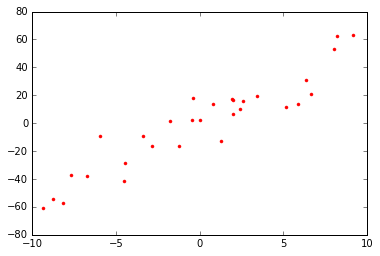

In [7]:
plt.plot(Cendata[0],Cendata[1], '.r')
plt.show()


In [8]:
U1,s1,V1 = lina.svd(Cendata)

print 'SingularValues \n {}'.format(s1)
print '-------------------------------\n\n'

print 'EigenValues \n {}'.format(s1**2)
print '-------------------------------\n\n'

#print V1
print 'Right Eigenvectors: \n {}'.format(V1.T)
print '-------------------------------\n\n'
# new observations


SingularValues 
 [ 176.56663077   10.19169501]
-------------------------------


EigenValues 
 [ 31175.77510104    103.87064713]
-------------------------------


Right Eigenvectors: 
 [[ 0.1534407  -0.98815786]
 [ 0.98815786  0.1534407 ]]
-------------------------------




[[ 0.1534407   0.98815786]
 [-0.98815786  0.1534407 ]]
 
[[ 0.02354405 -0.97645595]
 [-0.97645595  0.02354405]]
 
(30, 2)


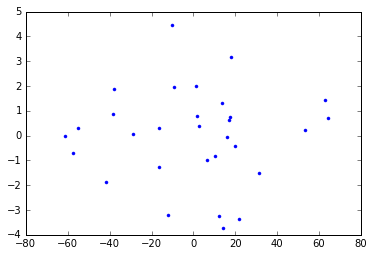

In [9]:
print V1
B=V1.T*V1
print " "
print B
print" "
newData=np.dot(Cendata,V1.T)

print newData.shape
plt.plot(newData[:,0],newData[:,1], '.b')
plt.show()

In [10]:
from skimage import io as skio

In [11]:
red=skio.imread("_Tif/po_221141_red_sub.tif")
red10x10=red[400:410,50:60]
ired=skio.imread("_Tif/po_221141_nir_sub.tif")
ired10x10=ired[400:410,50:60]

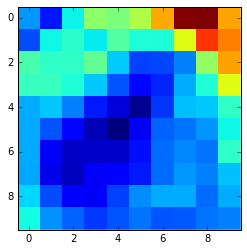

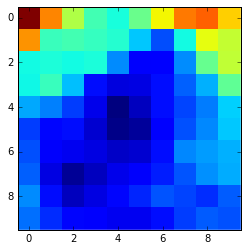

In [12]:
plt.imshow(red10x10,interpolation='none')
plt.show()
plt.imshow(ired10x10,interpolation='none')
plt.show()

In [13]:
print red10x10, "\n"
print ired10x10

[[580 559 594 619 615 626 652 694 695 653]
 [568 595 600 593 608 597 597 635 672 659]
 [606 601 601 611 588 566 567 576 620 653]
 [602 603 598 587 569 557 562 583 598 635]
 [583 587 576 560 549 539 564 586 587 601]
 [583 569 557 544 536 553 572 574 579 595]
 [583 553 546 547 547 558 573 577 574 601]
 [582 551 545 553 556 560 573 580 576 586]
 [590 568 556 553 566 578 583 583 573 583]
 [596 579 572 565 569 574 569 570 574 576]] 

[[836 792 753 728 718 737 769 794 799 777]
 [789 726 728 725 721 707 684 717 766 758]
 [717 719 717 719 696 667 668 696 736 757]
 [716 726 706 672 662 663 672 688 703 735]
 [701 694 681 664 646 657 672 683 693 709]
 [681 671 672 660 648 651 669 685 695 707]
 [685 667 665 663 658 660 672 695 699 703]
 [688 663 650 657 664 667 675 686 697 702]
 [696 672 657 663 671 677 686 683 678 687]
 [691 678 671 669 665 665 672 681 687 685]]


In [14]:
Data=np.zeros([100,2])

Data[:,0]=red10x10.reshape(100,1).ravel()
Data[:,1]=ired10x10.reshape(100,1).ravel()
print Data


[[ 580.  836.]
 [ 559.  792.]
 [ 594.  753.]
 [ 619.  728.]
 [ 615.  718.]
 [ 626.  737.]
 [ 652.  769.]
 [ 694.  794.]
 [ 695.  799.]
 [ 653.  777.]
 [ 568.  789.]
 [ 595.  726.]
 [ 600.  728.]
 [ 593.  725.]
 [ 608.  721.]
 [ 597.  707.]
 [ 597.  684.]
 [ 635.  717.]
 [ 672.  766.]
 [ 659.  758.]
 [ 606.  717.]
 [ 601.  719.]
 [ 601.  717.]
 [ 611.  719.]
 [ 588.  696.]
 [ 566.  667.]
 [ 567.  668.]
 [ 576.  696.]
 [ 620.  736.]
 [ 653.  757.]
 [ 602.  716.]
 [ 603.  726.]
 [ 598.  706.]
 [ 587.  672.]
 [ 569.  662.]
 [ 557.  663.]
 [ 562.  672.]
 [ 583.  688.]
 [ 598.  703.]
 [ 635.  735.]
 [ 583.  701.]
 [ 587.  694.]
 [ 576.  681.]
 [ 560.  664.]
 [ 549.  646.]
 [ 539.  657.]
 [ 564.  672.]
 [ 586.  683.]
 [ 587.  693.]
 [ 601.  709.]
 [ 583.  681.]
 [ 569.  671.]
 [ 557.  672.]
 [ 544.  660.]
 [ 536.  648.]
 [ 553.  651.]
 [ 572.  669.]
 [ 574.  685.]
 [ 579.  695.]
 [ 595.  707.]
 [ 583.  685.]
 [ 553.  667.]
 [ 546.  665.]
 [ 547.  663.]
 [ 547.  658.]
 [ 558.  660.]
 [ 573.  6

In [19]:
np.corrcoef(Data[:,0],Data[:,1])

array([[ 1.       ,  0.7620819],
       [ 0.7620819,  1.       ]])

In [28]:
COV=np.cov(Data[:,0],Data[:,1])
print COV
print COV[0,0]
print COV[1,1]
print "Sum of Variances: {}".format(COV[0,0]+COV[1,1])

[[  970.94989899   897.69414141]
 [  897.69414141  1429.08040404]]
970.94989899
1429.08040404
Sum of Variances: 2400.03030303


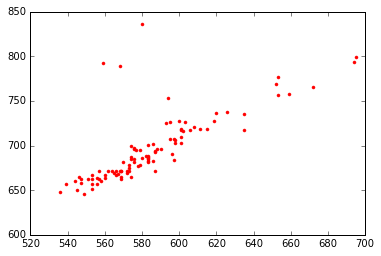

In [16]:
plt.plot(Data[:,0],Data[:,1],".r")
plt.show()

In [17]:
print '-------------------------------\n'
print 'Means of data columns \n {}'.format(np.mean(Data,axis=0))
print '-------------------------------\n'

-------------------------------

Means of data columns 
 [ 584.86  696.48]
-------------------------------



In [18]:
CenterData=Data - np.mean(Data,axis=0 )
print CenterData

[[  -4.86  139.52]
 [ -25.86   95.52]
 [   9.14   56.52]
 [  34.14   31.52]
 [  30.14   21.52]
 [  41.14   40.52]
 [  67.14   72.52]
 [ 109.14   97.52]
 [ 110.14  102.52]
 [  68.14   80.52]
 [ -16.86   92.52]
 [  10.14   29.52]
 [  15.14   31.52]
 [   8.14   28.52]
 [  23.14   24.52]
 [  12.14   10.52]
 [  12.14  -12.48]
 [  50.14   20.52]
 [  87.14   69.52]
 [  74.14   61.52]
 [  21.14   20.52]
 [  16.14   22.52]
 [  16.14   20.52]
 [  26.14   22.52]
 [   3.14   -0.48]
 [ -18.86  -29.48]
 [ -17.86  -28.48]
 [  -8.86   -0.48]
 [  35.14   39.52]
 [  68.14   60.52]
 [  17.14   19.52]
 [  18.14   29.52]
 [  13.14    9.52]
 [   2.14  -24.48]
 [ -15.86  -34.48]
 [ -27.86  -33.48]
 [ -22.86  -24.48]
 [  -1.86   -8.48]
 [  13.14    6.52]
 [  50.14   38.52]
 [  -1.86    4.52]
 [   2.14   -2.48]
 [  -8.86  -15.48]
 [ -24.86  -32.48]
 [ -35.86  -50.48]
 [ -45.86  -39.48]
 [ -20.86  -24.48]
 [   1.14  -13.48]
 [   2.14   -3.48]
 [  16.14   12.52]
 [  -1.86  -15.48]
 [ -15.86  -25.48]
 [ -27.86  -

In [76]:
np.corrcoef(CenterData[:,0],CenterData[:,1])

array([[ 1.       ,  0.7620819],
       [ 0.7620819,  1.       ]])

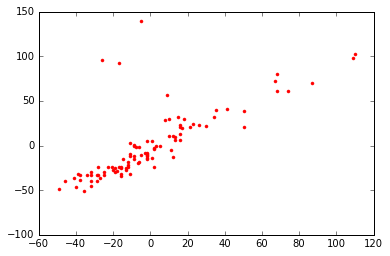

In [68]:
plt.plot(CenterData[:,0],CenterData[:,1], '.r')
plt.show()

In [40]:
U1,s1,V1 = lina.svd(CenterData)

print 'SingularValues \n {}'.format(s1)
print '-------------------------------\n\n'

print 'EigenValues \n {}'.format(s1**2)
print '-------------------------------\n\n'

#print V1
print 'Right Eigenvectors: \n {}'.format(V1)
print '-------------------------------\n\n'
# new observations

SingularValues 
 [ 458.82557472  164.5663756 ]
-------------------------------


EigenValues 
 [ 210520.90802148   27082.09197852]
-------------------------------


Right Eigenvectors: 
 [[ 0.61349482  0.78969875]
 [ 0.78969875 -0.61349482]]
-------------------------------




(100, 2)


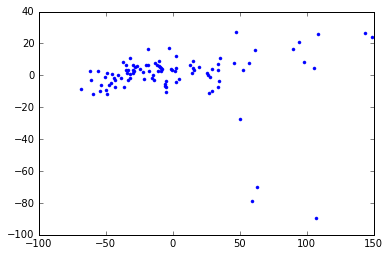

In [41]:
newData=np.dot(CenterData,V1)

print newData.shape
plt.plot(newData[:,0],newData[:,1], '.b')
plt.show()

In [53]:
print np.corrcoef(newData[:,0],newData[:,1]), "\n"

newCOV=np.cov(newData[:,0],newData[:,1])
print newCOV,"\n"
print "Variance of PC1: ",newCOV[0,0]
print "Variance of PC2: ",newCOV[1,1]
print "Sum of Variances: {} !(compare to Value above before PCA: {} )\n".format(newCOV[0,0]+newCOV[1,1], COV[0,0]+COV[1,1])

print "PC1 explains {:.2f}% of the variance".format(newCOV[0,0]*100.0/(newCOV[0,0]+newCOV[1,1]))
print "PC2 explains {:.2f}% of the variance\n".format(newCOV[1,1]*100.0/(newCOV[0,0]+newCOV[1,1]))



print "newData: \n{}".format(newData)

[[  1.00000000e+00   1.56586676e-16]
 [  1.56586676e-16   1.00000000e+00]] 

[[  2.12647382e+03   1.19428597e-13]
 [  1.19428597e-13   2.73556485e+02]] 

Variance of PC1:  2126.4738184
Variance of PC2:  273.556484632
Sum of Variances: 2400.03030303 !(compare to Value above before PCA: 2400.03030303 )

PC1 explains 88.60% of the variance
PC2 explains 11.40% of the variance

newData: 
[[  1.07197184e+02  -8.94327329e+01]
 [  5.95670481e+01  -7.90226346e+01]
 [  5.02411157e+01  -2.74568806e+01]
 [  4.58360175e+01   7.62295849e+00]
 [  3.54850508e+01   1.05991117e+01]
 [  5.72377700e+01   7.62939634e+00]
 [  9.84589951e+01   8.52972952e+00]
 [  1.43968246e+02   2.63597064e+01]
 [  1.48530235e+02   2.40819310e+01]
 [  1.05390080e+02   4.41146972e+00]
 [  6.27194053e+01  -7.00748614e+01]
 [  2.95327444e+01  -1.01028218e+01]
 [  3.41796160e+01  -7.38131767e+00]
 [  2.75160560e+01  -1.10687244e+01]
 [  3.35596833e+01   3.23073602e+00]
 [  1.57554579e+01   3.13297728e+00]
 [ -2.40761324e+00   1

# Add Mean Values and round

In [56]:
Data2=np.round(newData+np.mean(Data,axis=0))
print Data2


[[ 692.  607.]
 [ 644.  617.]
 [ 635.  669.]
 [ 631.  704.]
 [ 620.  707.]
 [ 642.  704.]
 [ 683.  705.]
 [ 729.  723.]
 [ 733.  721.]
 [ 690.  701.]
 [ 648.  626.]
 [ 614.  686.]
 [ 619.  689.]
 [ 612.  685.]
 [ 618.  700.]
 [ 601.  700.]
 [ 582.  714.]
 [ 632.  723.]
 [ 693.  723.]
 [ 679.  717.]
 [ 614.  701.]
 [ 613.  695.]
 [ 611.  697.]
 [ 619.  703.]
 [ 586.  699.]
 [ 550.  700.]
 [ 551.  700.]
 [ 579.  690.]
 [ 638.  700.]
 [ 674.  713.]
 [ 611.  698.]
 [ 619.  693.]
 [ 600.  701.]
 [ 567.  713.]
 [ 548.  705.]
 [ 541.  695.]
 [ 552.  693.]
 [ 577.  700.]
 [ 598.  703.]
 [ 646.  712.]
 [ 587.  692.]
 [ 584.  700.]
 [ 567.  699.]
 [ 544.  697.]
 [ 523.  699.]
 [ 526.  684.]
 [ 553.  695.]
 [ 575.  706.]
 [ 583.  700.]
 [ 605.  702.]
 [ 571.  705.]
 [ 555.  700.]
 [ 548.  689.]
 [ 531.  687.]
 [ 517.  688.]
 [ 529.  699.]
 [ 555.  703.]
 [ 569.  695.]
 [ 580.  693.]
 [ 599.  698.]
 [ 575.  702.]
 [ 542.  689.]
 [ 536.  685.]
 [ 535.  687.]
 [ 531.  690.]
 [ 540.  698.]
 [ 558.  7

# Reshape back to Image

In [62]:
PC1  =Data2[:,0].reshape(10,10)
PC2  =Data2[:,1].reshape(10,10)
print PC1,"\n"
print PC2


[[ 692.  644.  635.  631.  620.  642.  683.  729.  733.  690.]
 [ 648.  614.  619.  612.  618.  601.  582.  632.  693.  679.]
 [ 614.  613.  611.  619.  586.  550.  551.  579.  638.  674.]
 [ 611.  619.  600.  567.  548.  541.  552.  577.  598.  646.]
 [ 587.  584.  567.  544.  523.  526.  553.  575.  583.  605.]
 [ 571.  555.  548.  531.  517.  529.  555.  569.  580.  599.]
 [ 575.  542.  536.  535.  531.  540.  558.  579.  580.  600.]
 [ 576.  538.  524.  534.  542.  546.  561.  574.  580.  590.]
 [ 588.  555.  536.  539.  553.  565.  575.  573.  563.  576.]
 [ 587.  567.  557.  551.  550.  553.  556.  564.  571.  570.]] 

[[ 607.  617.  669.  704.  707.  704.  705.  723.  721.  701.]
 [ 626.  686.  689.  685.  700.  700.  714.  723.  723.  717.]
 [ 701.  695.  697.  703.  699.  700.  700.  690.  700.  713.]
 [ 698.  693.  701.  713.  705.  695.  693.  700.  703.  712.]
 [ 692.  700.  699.  697.  699.  684.  695.  706.  700.  702.]
 [ 705.  700.  689.  687.  688.  699.  703.  695.  6

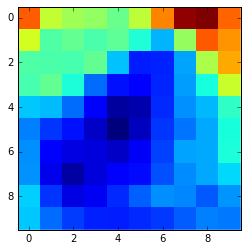

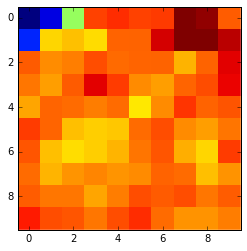

In [60]:
plt.imshow(PC1,interpolation='none')
plt.show()
plt.imshow(PC2,interpolation='none')
plt.show()